In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from skimage.io import imread
from skimage.transform import resize
import cv2
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [2]:

# Data and model parameters
img_ch, img_width, img_height = 1, 128, 128
n_epochs = 80
Batch_Size = 8
Base = 8
LR = 0.00001

TRAIN_DIR = '/DL_course_data/Lab2/Bone/train/'
VAL_DIR = '/DL_course_data/Lab2/Bone/validation/'

In [3]:
def model(img_ch, img_width, img_height):
    
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=Base, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=Base*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=Base*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=Base*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=Base*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=Base*8, kernel_size=(3,3), strides=(1,1), padding='same', name = 'Last_ConvLayer'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

  
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(2))
    model.add(Activation('softmax'))    # Model Architecture in Whole
    model.summary()

    return model


In [4]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rescale=1./255,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(img_width, img_height),
                                                    color_mode="grayscale",
                                                    #class_mode='binary'
                                                    batch_size = Batch_Size)

# Create validation generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(VAL_DIR, 
                                                target_size=(img_width, img_height),
                                                color_mode="grayscale",
                                                batch_size = Batch_Size,
                                                #class_mode='binary',
                                                seed=42)

Found 1112 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [5]:
model = model(img_ch, img_width, img_height)
model.compile(loss = 'categorical_crossentropy',          # Model Compiling   
              optimizer = Adam(lr = LR),
              metrics = ['accuracy'])

# Run training for certain amount of epochs
History = model.fit_generator(train_generator, steps_per_epoch = 1112//Batch_Size,
    validation_data = val_generator, validation_steps = 96//Batch_Size,
    epochs = n_epochs,  verbose=1)


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       584       
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 8)      32        
 hNormalization)                                                 
                                                  

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-5-d92ba65fde95>:8: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(train_generator, steps_per_epoch = 1112//Batch_Size,


Epoch 1/80
139/139 [==============================] - ETA: 0s - batch: 69.0000 - size: 8.0000 - loss: 1.0807 - accuracy: 0.5072

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


139/139 [==============================] - 22s 135ms/step - batch: 69.0000 - size: 8.0000 - loss: 1.0807 - accuracy: 0.5072 - val_loss: 0.7136 - val_accuracy: 0.5000
Epoch 2/80
139/139 [==============================] - 19s 140ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.9336 - accuracy: 0.5378 - val_loss: 0.7496 - val_accuracy: 0.5000
Epoch 3/80
139/139 [==============================] - 20s 142ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.8413 - accuracy: 0.5665 - val_loss: 0.7108 - val_accuracy: 0.5104
Epoch 4/80
139/139 [==============================] - 19s 139ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.8233 - accuracy: 0.5513 - val_loss: 0.5871 - val_accuracy: 0.6667
Epoch 5/80
139/139 [==============================] - 19s 140ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.7740 - accuracy: 0.5827 - val_loss: 0.5514 - val_accuracy: 0.7500
Epoch 6/80
139/139 [==============================] - 19s 134ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.7155 - accuracy

1


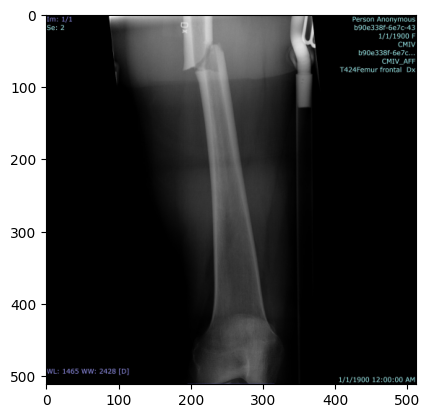

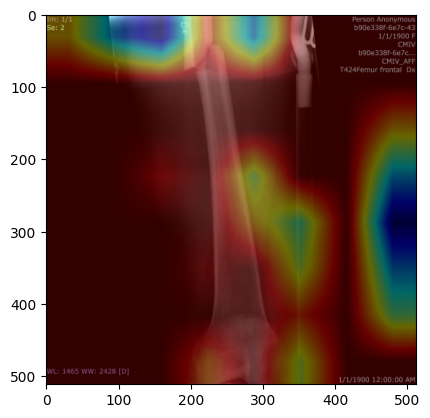

In [10]:
Sample = '/DL_course_data/Lab2/Bone/train/AFF/120.jpg'
Img = imread(Sample)
Img = Img[:,:,0]
Img = Img/255
Img = resize(Img, (img_height, img_width), anti_aliasing = True).astype('float32')
Img = np.expand_dims(Img, axis = 2) 
Img = np.expand_dims(Img, axis = 0)
preds = model.predict(Img)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("Last_ConvLayer")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([Img])
for i in range(Base*8):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


img = cv2.imread(Sample)
img = cv2.resize(img, (512, 512), interpolation = cv2.INTER_AREA)
#img = img/255
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(superimposed_img)
plt.show()

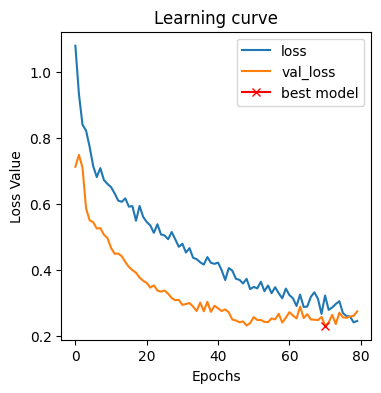

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

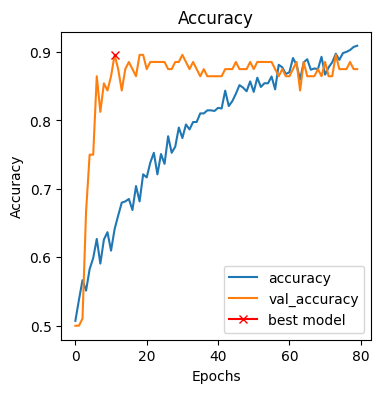

In [8]:
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(History.history["accuracy"], label="accuracy")
plt.plot(History.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(History.history["val_accuracy"]),
         np.max(History.history["val_accuracy"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()